In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os

In [3]:
file_dir = "./data/"

def read_t(t,root="./", str_check=False):
  if not str_check :
    data = pickle.load(open(root+'Ising2DFM_reSample_L40_T=%.2f.pkl'%t,'rb'))
  else :
    data = pickle.load(open(root+f'Ising2DFM_reSample_L40_T={t}.pkl','rb'))
  return np.unpackbits(data).astype(int).reshape(-1,1600)

In [4]:
data_all = read_t("All", file_dir, True)
data_label = pickle.load(open(file_dir+f'Ising2DFM_reSample_L40_T=All_labels.pkl','rb'))

nom_temp = np.arange(0.25, 4.25, 0.25)

tot_data = np.empty((0,40,40))
tot_label = np.empty(0)

for T in nom_temp :
  tmp = read_t(T, file_dir)
  tot_data = np.concatenate((tot_data, tmp.reshape(tmp.shape[0], 40, 40)))
  tot_label = np.concatenate((tot_label, T*np.ones(tmp.shape[0])))

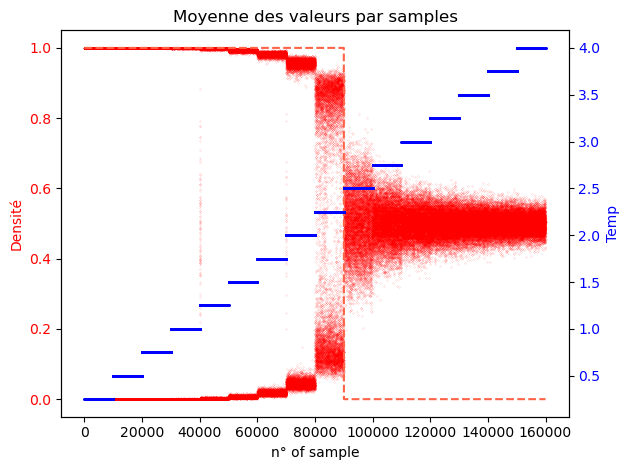

In [5]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('n° of sample')
ax1.set_ylabel('Densité', color="red")
ax1.scatter(range(160000), tot_data.reshape(tot_data.shape[0], 40*40).mean(axis=1), s=.005, label="Mean value of samples", c="r")
ax1.plot(range(160000), data_label, "--", label="Labels", c='tomato')
ax1.tick_params(axis='y', labelcolor="r")

ax2 = ax1.twinx()

ax2.set_ylabel('Temp', color="b")
ax2.scatter(range(160000), tot_label, s=.1, label="Temps", c="b")
ax2.tick_params(axis='y', labelcolor="b")

ax1.set_title("Moyenne des valeurs par samples")

fig.tight_layout()
plt.show()

In [42]:
tmp = np.loadtxt("./mydata/couche_40_1.03.txt")
tmp.shape

(50, 1600)

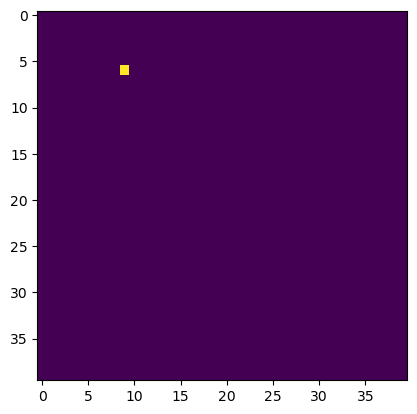

In [43]:
plt.imshow(tmp[20].reshape(40,40))

In [59]:
files = os.listdir("./mydata/")
mean_up = np.empty(0)
my_temp = np.empty(0)
for file in files :
    if file[:6] != "couche" :
        continue
    tmp = np.loadtxt("./mydata/"+file)
    mean_up= np.concatenate((mean_up, tmp.mean(axis=1)))
    my_temp = np.concatenate((my_temp, np.ones(tmp.shape[0])*float(file[-8:-4])))


In [57]:
print(my_temp.shape)
print(mean_up.shape)

(19070,)
(19070,)


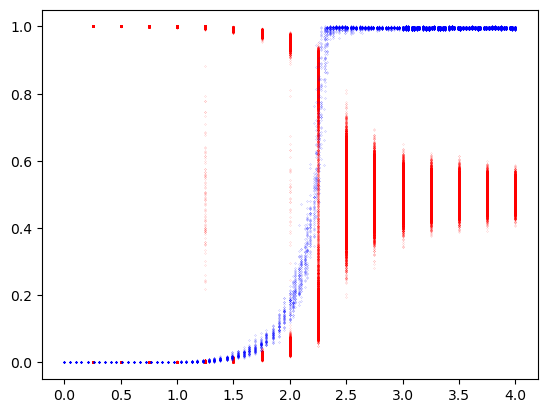

In [60]:
plt.scatter(tot_label, tot_data.reshape(tot_data.shape[0], 40*40).mean(axis=1), s=.005, label="Mean value of samples", c="r")
plt.scatter(my_temp, mean_up, s=.01, label="Mean value of samples", c="b")